# Ex ante vs. interrim maximization 

Recall that we have the distinction in timing: 
* **Ex ante:** Before the game
* **Interrim:** Player types are revealed but no actions have yet been taken. 
* **Ex post:** After actions have been taken, when payoffs are realized. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

plt.rcParams.update({"text.usetex": True, 'font.size':14})
np.random.seed(1337)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Interrim maximization 

Maximizing expected utility *conditional* on own type. That is, we are solving: 
$$ b^*(v_i) = \arg \max_b \mathbb{E}(u_i(b, b_{-1}; v_i)) $$
There is one of these maximization problems for each realization of $v_i$. 

In [47]:
def Eu_interrim(b1, b2, v1): 
    u = (b1 > b2) * (v1 - b1)
    return np.mean(u)

In [48]:
# first-price sealed bid optimal bid
def b_star(v, N): 
    return v * (N-1) / N 

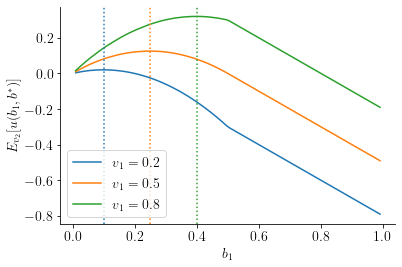

In [49]:
R = 100000 # simulations, to compute expectations by simulated average
N = 2 # 2 players 

v2 = np.random.uniform(0,1,(R,))
b2 = b_star(v2, N) # opponent is playing BNE  

xx = np.linspace(0.01, 0.99, 100)
yy = np.empty((100,3))
vv1 = [.2, .5, .8]

for iv,v1 in enumerate(vv1): 
    for i,b1 in enumerate(xx): 
        yy[i, iv] = Eu_interrim(b1, b2, v1)

ax = plt.plot(xx, yy);
plt.legend([f'$v_1={v}$' for v in vv1], loc='best')
sns.despine(); 
for i,v1 in enumerate(vv1): 
    plt.axvline(b_star(v1, N=2), color=colors[i], linestyle=':')
plt.xlabel('$b_1$'); plt.ylabel('$E_{v_2}[u(b_1, b^*)]$'); 
plt.savefig('img/fpsb_EU_interrim.pdf')

# Ex Ante maximization

Maximizing utility, integrating out own type as well: here, we're not searching for optimal bid, but rather for the optimal *slope* of the line, $b(v) = c\times v$. That is, we are searching for a strategy to commit to before observing our own type. 

In other words: **the x axis is different!** 

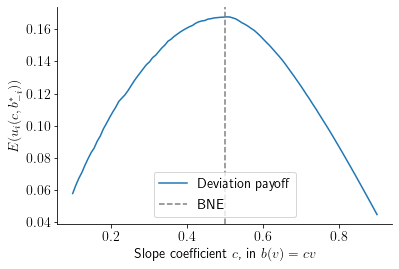

In [26]:
# take R draws of independent values 
R = 10000
v1 = np.random.uniform(0,1,(R,)) # own valuation 
v2 = np.random.uniform(0,1,(R,)) # opponent valuation 
b2 = b_star(v2, N=2)             # bid of opponent (sticking to the BNE)

xx = np.linspace(0.1, 0.9, 100)
yy = np.empty((100,))


for i,x in enumerate(xx): 
    b1 = x * v1 # bid using this bidding rule
    I_win = b1 > b2 # =1 when we win 
    u_win = v1 - b1 # utility when we win 
    yy[i] = np.mean(I_win * u_win)

plt.plot(xx,yy,label='Deviation payoff'); 
plt.xlabel('Slope coefficient $c$, in $b(v) = cv$'); 
plt.ylabel('$E(u_i(c, b_{-i}^*))$'); 
sns.despine(); plt.axvline(0.5, color='gray', linestyle='--', label='BNE'); 
plt.legend(loc='best'); 

plt.savefig('img/fpsb_EU_ex_ante.pdf'); 
plt.show(); 